In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
csv_path = "/content/drive/MyDrive/A-Z Dataset/A_Z Handwritten Data.csv.zip"

In [4]:
df = pd.read_csv(csv_path)

In [5]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(372450, 785)

In [7]:
X = df.drop('0',axis = 1) 
y = df['0']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)

**Preprocessing The Input Images**

*   m = no.of training data
*   resize the images into (m * 28 * 28)



In [9]:
X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28,1))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28,1)) 

In [10]:
print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (297960, 28, 28, 1)
Test data shape:  (74490, 28, 28, 1)


**Preprocessing the Labels**



*   convert the labels to one hot encoding
*   using the to_categorical from keras
*   m = no.of.data in training and testing
*   output is of the shape (m,26)



In [11]:
Y_train = to_categorical(Y_train,num_classes=26,dtype="int")
Y_test = to_categorical(Y_test,num_classes=26,dtype="int")

In [12]:
print("New shape of train labels: ", Y_train.shape)
print("New shape of test labels: ", Y_test.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [13]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding="same",input_shape=(28,28,1),activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(26,activation="softmax"))


In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

In [ ]:
history = model.fit(x=X_train, y=Y_train, epochs=2,  
                    validation_data = (X_test,Y_test))

In [18]:
score = model.evaluate(X_test, Y_test, verbose = 0) 

In [19]:
print(score)

[0.05509849265217781, 0.9846959114074707]


In [20]:
model.save("english.h5")

In [21]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 2.9 MB/s 


In [22]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model,"english_tfjs")

(28, 28, 1)
0
Prediction ::  0


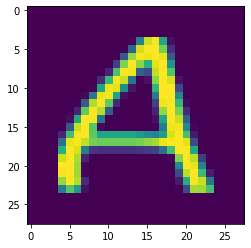

In [35]:
index = 9113

data = X_test[index]
print(data.shape)

plt.imshow(data.reshape(28,28))
print(Y_test[index].argmax())

prediction = model.predict(data[None,...])
print("Prediction :: ",prediction.argmax())